# A short tutorial to using Grid3D
`Grid3D` is a lightweight utility in `EXPtools` for generating structured 3D grids in different coordinate systems and transforming them between:

- Cartesian: 
- Spherical: 
- Cylindrical: 

- Cartesian: $(x, y, z)$
- Spherical: $(r, \theta, \phi)$
    * $r \leq 0$
    * $\theta \in [0, \pi)$ (polar angle in the xy-plane)
    * $\phi \in [0, 2\pi]$  (azimuthal angle from +z axis)
- Cylindrical: $(\rho, \phi, z)$
    * $rho \leq 0$
    * $phi \in [0, 2\pi)$
    * $z \in \Re$

This tutorial will show:

- How to build spherical and cylindrical grids
- How to transform them into Cartesian coordinates
- How to visualize the resulting point distributions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from EXPtools.visuals import Grid3D


## Example 1: Spherical grid → Cartesian

We generate a spherical grid with:

Radius between 0.5 and 2.0 with uniform sampling in volume.
Angular coordinates are handled internally

In [20]:
n_rbins=6
n_thetabins=16
n_phibins=8

In [21]:
grid_sph = Grid3D(
    system="spherical",
    ranges=[(0.5, 2.0), None, None],
    num_points=[n_rbins, n_thetabins, n_phibins],
)

spherical_coords = grid_sph.get()
spherical_coords[:5]


array([[0.5       , 0.        , 3.14159265],
       [0.5       , 0.        , 2.36639928],
       [0.5       , 0.        , 2.01370737],
       [0.5       , 0.        , 1.7141439 ],
       [0.5       , 0.        , 1.42744876]])

The grid is returned as an (N, 3) array containing $(r, \theta, \phi).$
Angular units are in radians

In [22]:
cart_from_sph = grid_sph.to("cartesian")
cart_from_sph[:5]


array([[ 6.12323400e-17,  0.00000000e+00, -5.00000000e-01],
       [ 3.49927106e-01,  0.00000000e+00, -3.57142857e-01],
       [ 4.51753951e-01,  0.00000000e+00, -2.14285714e-01],
       [ 4.94871659e-01,  0.00000000e+00, -7.14285714e-02],
       [ 4.94871659e-01,  0.00000000e+00,  7.14285714e-02]])

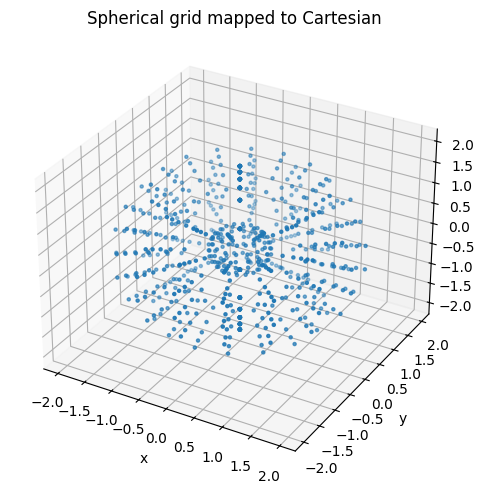

In [23]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection="3d")

ax.scatter(
    cart_from_sph[:, 0],
    cart_from_sph[:, 1],
    cart_from_sph[:, 2],
    s=5,
)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Spherical grid mapped to Cartesian")

plt.tight_layout()
plt.show()


By default radial bins are evenly distributed by volume (as shown in the Figure above). However, one can specify radial bind using the `r_bins` 
argument. 

In [26]:
r_bins = np.logspace(-1, 2, n_rbins)

grid_logr = Grid3D(
    system="spherical",
    ranges=[(0.1, 100.0), None, None],  # ignored for r
    num_points=[n_rbins, n_thetabins, n_phibins],          # n_rbins will be ignored
    r_bins=r_bins
)

spherical_coords_log = grid_logr.get()


In [27]:
cart_from_sph_log = grid_logr.to("cartesian")


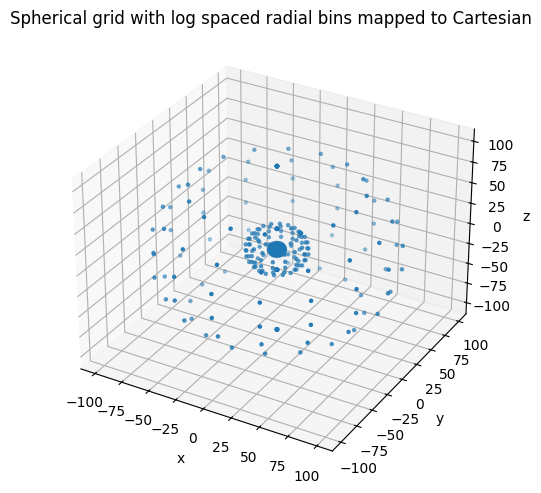

In [28]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection="3d")

ax.scatter(
    cart_from_sph_log[:, 0],
    cart_from_sph_log[:, 1],
    cart_from_sph_log[:, 2],
    s=5,
)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Spherical grid with log spaced radial bins mapped to Cartesian")

plt.tight_layout()
plt.show()

## Example 2: Cylindrical grid → Cartesian

Radial coordinate $\rho$ ∈ [0.2, 1.5]

Vertical extent $z$ ∈ [-1, 1]

Uniform sampling in $\rho$, $\theta$, and $z$

In [29]:
grid_cyl = Grid3D(
    system="cylindrical",
    ranges=[(0.2, 1.5), None, (-1.0, 1.0)],
    num_points=[6, 24, 6],
)

cyl_coords = grid_cyl.get()
cyl_coords[:5]

#The grid is returned as (ρ, θ, z).

array([[ 0.2,  0. , -1. ],
       [ 0.2,  0. , -0.6],
       [ 0.2,  0. , -0.2],
       [ 0.2,  0. ,  0.2],
       [ 0.2,  0. ,  0.6]])

In [30]:
cart_from_cyl = grid_cyl.to("cartesian")
cart_from_cyl[:5]


array([[ 0.2,  0. , -1. ],
       [ 0.2,  0. , -0.6],
       [ 0.2,  0. , -0.2],
       [ 0.2,  0. ,  0.2],
       [ 0.2,  0. ,  0.6]])

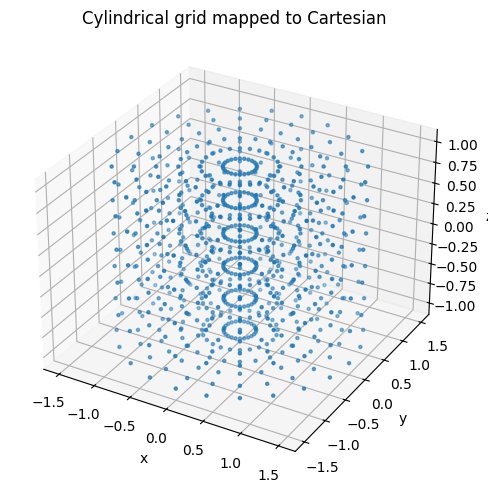

In [31]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection="3d")

ax.scatter(
    cart_from_cyl[:, 0],
    cart_from_cyl[:, 1],
    cart_from_cyl[:, 2],
    s=5,
)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Cylindrical grid mapped to Cartesian")

plt.tight_layout()
plt.show()


### Example 3. Transformations between non-Cartesian systems

Grid3D supports direct transformations between any supported systems.
Internally, all transformations go through Cartesian coordinates.

In [32]:
# spherical → cylindrical
sph_to_cyl = grid_sph.to("cylindrical")

# cylindrical → spherical
cyl_to_sph = grid_cyl.to("spherical")
